# Practicum: fitopgave

Arnout Coenegrachts, r0665757

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
import unicodedata
import scipy.stats as stat

In [5]:
Data5 = pd.read_csv('Data5.txt', sep=" ", header=None)

In [6]:
Intensiteit = np.array(Data5[1])
Positie = np.array(Data5[0])
SigmaI = np.array(np.sqrt(Intensiteit))

### 1) Plot van de data uit dataset 5 met bijhorende errorbars:

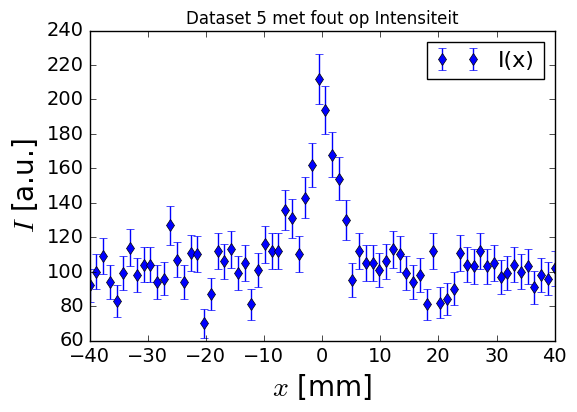

In [7]:
FigVi = plt.figure()
plt.errorbar(Positie, Intensiteit, SigmaI, label = 'I(x)', fmt = 'd ')
plt.ylabel(r'$I$ [a.u.]', size=20)
plt.xlabel('$x$ [mm]', size=20)
plt.legend(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title("Dataset 5 met fout op Intensiteit")
plt.show()

### 2) Fitten van de data:

### 2.1) best passende waardes bepalen en de best passende fit plotten:

De fit wordt gemaakt met behulp van de Lorentz-functie: $$L(x | a, \gamma, \mu, b) = a\frac{\gamma}{((x-\mu)^2+\gamma^2)}+b$$ waarbij x de positie in mm, a de amplitude in mm, $\gamma$ de schaalparameter in mm, $\mu$ de verwachte waarde van de positie in mm en b de locatieparameter zijn.
Hiervoor worden de beste passende waardes van parameters a, $\gamma$, $\mu$ en b geschatten met behulp van $$ \chi^2\vec(\theta) = \sum_i\frac{(y_i-f(x_i\vec|\theta)^2}{\sigma_i^2} $$ waarbij f de Lorentz-functie is, y de gemeten intensiteit-waarden, $\sigma$ de ($1\sigma$-)fout op de intensiteit $\left(\sigma_i = \sqrt(I_i)\right)$en $\vec \theta$ de te schatten parameters zijn:

In [8]:
def model(x,a,g,u,b):
    return a*g/((x-u)**2+g**2)+b

x0 = [1,1,1,1]

def chi2(x,y,param,s):
    diff = y - model(x,param[0],param[1],param[2],param[3])
    return np.sum((diff/s)**2)
    
chi2ftie = lambda param: chi2(Positie, Intensiteit, param, SigmaI)

result = opt.minimize(chi2ftie,x0)
a,g,u,b = result.x
print(a,g,u,b)

256.544604444 2.33422712975 -0.0240085011801 97.9611009654


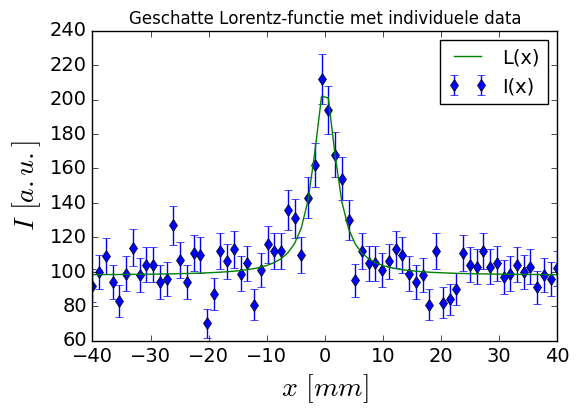

In [9]:
FigVi = plt.figure()
plt.errorbar(Positie, Intensiteit, SigmaI, label = 'I(x)', fmt = 'd')
plt.ylabel(r'$I$ $[a.u.]$', size=20)
plt.xlabel('$x$ $[mm]$', size=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.plot(Positie, model(Positie,a,g,u,b), label = 'L(x)')
plt.legend(fontsize=14)
plt.title("Geschatte Lorentz-functie met individuele data")
plt.show()

In [7]:
print(a,g,u,b)

256.544604444 2.33422712975 -0.0240085011801 97.9611009654


De best gefitte waarden van de parameters zijn: 

|Parameter | waarde |
|----------|----------------- |
|a         | 256.544604444 mm |
|$\gamma$  | 2.33422712975 mm |
|$\mu$ | -0.0240085011801 mm |
|b         | 97.9611009654|


### 2.2) Fout op de fitwaarden bepalen:

Nu worden voor elk van deze parameters de ($1\sigma$-)fout bepaald, door telkens een van deze parameters te laten variëren en de andere drie constant te houden in de $\chi^2$-formule. Dit wordt telkens ook geplot.

### 2.2.1) Amplitude a:

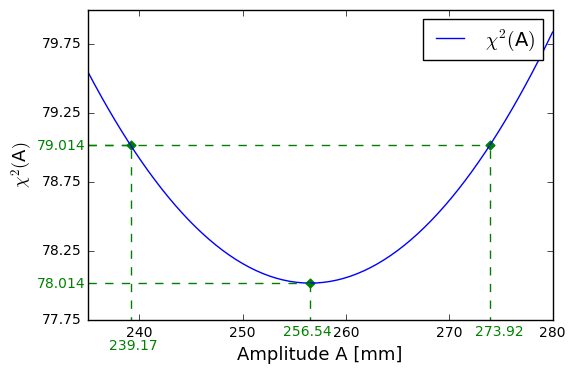

De linkerfout is 17.37 mm en de rechterfout is 17.38 mm op a = 256.54 mm


In [8]:
#fout op amplitude a:
f = lambda A: chi2(Positie, Intensiteit, [A,g,u,b], SigmaI) - chi2(Positie, Intensiteit, [a,g,u,b], SigmaI) - 1
A1 = opt.fsolve(f,150)[0]
A2 = opt.fsolve(f,400)[0]

a0 = round(a,2)
A10 = round(A1,2)
A20 = round(A2,2)
sa1 = a0 - A10
sa2 = A20 - a0

#Grafiek van chi-kwadraat in functie van de amplitude a
FigA = plt.figure()
Ax = np.linspace(235, 280, 70)
chikwadraat = lambda A: chi2(Positie, Intensiteit, [A,g,u,b], SigmaI)
Ay = np.array(list(map(chikwadraat,Ax)))
plt.plot(Ax, Ay, label = r'$\chi^{2}($A$)$')

#Stippellijnen:
CA1 = chikwadraat(A1)
Ca = chikwadraat(a)
CA2 = chikwadraat(A2)

QA = np.linspace(77,CA1,50) #verticale rechte tot 1 sigma verschil
qA = [CA1]*50               #horizontale rechte tot 1 sigma verschil
Qa = np.linspace(77,Ca)     #verticale rechte tot minimum
qa = [Ca]*50                #horizontale rechte tot minimum

MinEenVX = [A1]*50
plt.plot(MinEenVX, QA, 'g--' )
MinEenHX = np.linspace(235, A1, 50)
plt.plot(MinEenHX, qA, 'g--')

PlusEenVX = [A2]*50
plt.plot(PlusEenVX, QA, 'g--' )
PlusEenHX = np.linspace(235, A2, 50)
plt.plot(PlusEenHX,qA, 'g--')

NulVX = [a]*50
plt.plot(NulVX, Qa, 'g--')
NulHX = np.linspace(235,a,50)
plt.plot(NulHX, qa, 'g--')

#belangrijke punten:
plt.scatter([A1,a,A2],[CA1, Ca, CA2],color = 'g', marker = 'D')
plt.figtext(0.16,0.05,str(A10), color = 'g',rotation = 0)
plt.figtext(0.45,0.085,str(a0), color = 'g',rotation = 0)
plt.figtext(0.77,0.085,str(A20), color = 'g',rotation = 0)
plt.figtext(0.04, 0.55, str(round(CA1,3)), color = 'g')
plt.figtext(0.04, 0.205, str(round(Ca,3)), color = 'g')

#opmaak van de grafiek:
plt.axis([235,280,77.75,80])
plt.xlabel("Amplitude A [mm]", fontsize = 13)
plt.ylabel(r'$\chi^{2}($A$)$', fontsize = 13)
plt.xticks([240,250,260,270,280],[240,250,260,270,280])
plt.yticks([77.75, 78.25, 78.75, 79.25, 79.75],[77.75, 78.25, 78.75, 79.25, 79.75])
plt.legend(fontsize=14)
plt.show()

print("De linkerfout is "+str(sa1)+" mm en de rechterfout is "+str(sa2)+" mm op a = "+str(a0)+" mm")

De amplitude a is dus gelijk aan $256.54^{+17.38}_{-17.37}$ mm.

### 2.2.2) Schaalparameter $\gamma$:

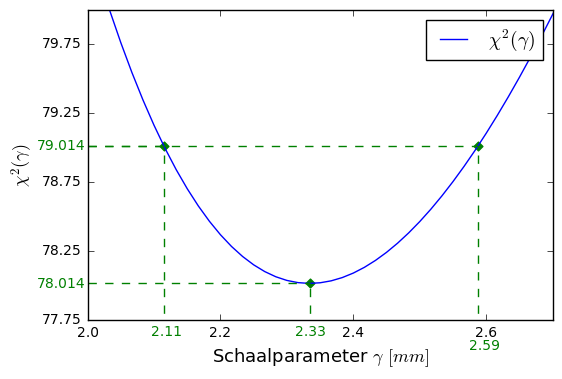

De linkerfout is 0.22 mm en de rechterfout is 0.25 mm op γ = 2.33 mm.


In [9]:
#fout op schaalparameter g:
h = lambda G: chi2(Positie, Intensiteit, [a,G,u,b], SigmaI) - chi2(Positie, Intensiteit, [a,g,u,b], SigmaI)-1
G1 = opt.fsolve(h,1.5)[0]
G2 = opt.fsolve(h,3.5)[0]

sg1 = round(g - G1,2)
sg2 = round(G2 - g,2)
g0 = round(g,2)
G10 = round(G1,2)
G20 = round(G2,2)

#Grafiek van chi-kwadraat in functie van de schaalparameter g
FigG = plt.figure()
Gx = np.linspace(1.75, 2.9, 70)
chikwadraat = lambda G: chi2(Positie, Intensiteit, [a,G,u,b], SigmaI)
Gy = np.array(list(map(chikwadraat,Gx)))
plt.plot(Gx, Gy, label = r'$\chi^{2}(\gamma)$')

#Stippellijnen:
CG1 = chikwadraat(G1)
Cg = chikwadraat(g)
CG2 = chikwadraat(G2)

QG = np.linspace(77,CG1,50) #verticale rechte tot 1 sigma verschil
qG = [CG1]*50               #horizontale rechte tot 1 sigma verschil
Qg = np.linspace(77,Cg)     #verticale rechte tot minimum
qg = [Cg]*50                #horizontale rechte tot minimum

MinEenVX = [G1]*50
plt.plot(MinEenVX, QG, 'g--' )
MinEenHX = np.linspace(2, G1, 50)
plt.plot(MinEenHX, qG, 'g--')

PlusEenVX = [G2]*50
plt.plot(PlusEenVX, QG, 'g--' )
PlusEenHX = np.linspace(2, G2, 50)
plt.plot(PlusEenHX, qG, 'g--')

NulVX = [g]*50
plt.plot(NulVX, Qg, 'g--')
NulHX = np.linspace(2,g,50)
plt.plot(NulHX, qg, 'g--')

#belangrijke punten:
plt.scatter([G1,g,G2],[CG1,Cg,CG2],color = 'g', marker = 'D')
plt.figtext(0.23,0.085,str(G10), color = 'g',rotation = 0)
plt.figtext(0.47,0.085,str(g0), color = 'g',rotation = 0)
plt.figtext(0.76,0.05,str(G20), color = 'g',rotation = 0)
plt.figtext(0.04, 0.55, str(round(CG1,3)), color = 'g')
plt.figtext(0.04, 0.205, str(round(Cg,3)), color = 'g')

#opmaak van de grafiek:
plt.axis([2,2.7,77.75,80])
plt.xlabel(r"Schaalparameter $\gamma$ $[mm]$", fontsize = 13)
plt.ylabel(r'$\chi^{2}(\gamma)$', fontsize = 13)
plt.xticks([2.0,2.2,2.4,2.6],[2.0,2.2,2.4,2.6])
plt.yticks([77.75, 78.25, 78.75, 79.25, 79.75],[77.75, 78.25, 78.75, 79.25, 79.75])
plt.legend(fontsize=14)
plt.show()

print("De linkerfout is "+str(sg1)+" mm en de rechterfout is "+str(sg2)+" mm op "+u"\u03B3"+" = "+str(g0)+" mm.")

De schaalparameter $\gamma$ is dus gelijk aan $2.33^{+0.25}_{-0.22}$mm.

### 2.2.3) Verwachte waarde $\mu$:

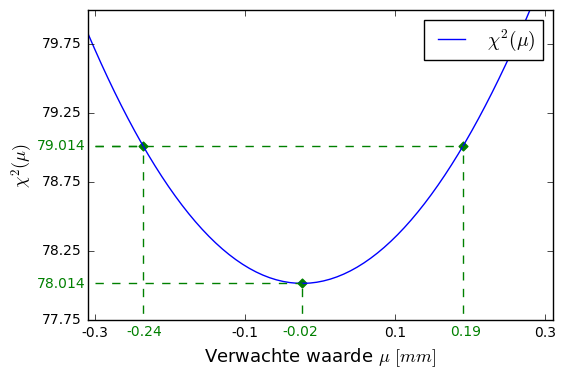

De linkerfout is 0.21 mm en de rechterfout is 0.21 mm op μ = -0.02 mm


In [10]:
#fout op verwachte waarde u:
i = lambda U: chi2(Positie, Intensiteit, [a,g,U,b], SigmaI) - chi2(Positie, Intensiteit, [a,g,u,b], SigmaI)-1
U1 = opt.fsolve(i,-1)[0]
U2 = opt.fsolve(i,1)[0]

su1 = round(u - U1,2)
su2 = round(U2 - u,2)
u0 = round(u,2)
U10 = round(U1,2)
U20 = round(U2,2)

#Grafiek van chi-kwadraat in functie van de verwachte waarde u
FigU = plt.figure()
Ux = np.linspace(-0.31, 0.31, 70)
chikwadraat = lambda U: chi2(Positie, Intensiteit, [a,g,U,b], SigmaI)
Uy = np.array(list(map(chikwadraat,Ux)))
plt.plot(Ux, Uy, label = r'$\chi^{2}(\mu)$')

#Stippellijnen:
CU1 = chikwadraat(U1)
Cu = chikwadraat(u)
CU2 = chikwadraat(U2)

QU = np.linspace(77,CU1,50) #verticale rechte tot 1 sigma verschil
qU = [CU1]*50               #horizontale rechte tot 1 sigma verschil
Qu = np.linspace(77,Cu)     #verticale rechte tot minimum
qu = [Cu]*50                #horizontale rechte tot minimum

MinEenVX = [U1]*50
plt.plot(MinEenVX, QU, 'g--' )
MinEenHX = np.linspace(-0.3, U1, 50)
plt.plot(MinEenHX, qU, 'g--')

PlusEenVX = [U2]*50
plt.plot(PlusEenVX, QU, 'g--' )
PlusEenHX = np.linspace(-0.3, U2, 50)
plt.plot(PlusEenHX, qU, 'g--')

NulVX = [u]*50
plt.plot(NulVX, Qu, 'g--')
NulHX = np.linspace(-0.3,u,50)
plt.plot(NulHX, qu, 'g--')

#belangrijke punten:
plt.scatter([U1,u,U2],[CU1,Cu,CU2],color = 'g', marker = 'D')
plt.figtext(0.19,0.085,str(U10), color = 'g',rotation = 0)
plt.figtext(0.45,0.085,str(u0), color = 'g',rotation = 0)
plt.figtext(0.73,0.085,str(U20), color = 'g',rotation = 0)
plt.figtext(0.04, 0.55, str(round(CU1,3)), color = 'g')
plt.figtext(0.04, 0.205, str(round(Cu,3)), color = 'g')

#opmaak van de grafiek:
plt.axis([-0.31,0.31,77.75, 80])
plt.xlabel(r"Verwachte waarde $\mu$ $[mm]$", fontsize = 13)
plt.ylabel(r'$\chi^{2}(\mu)$', fontsize = 13)
plt.xticks([-0.3,-0.1,0.1,0.3],[-0.3,-0.1,0.1,0.3])
plt.yticks([77.75, 78.25, 78.75, 79.25, 79.75],[77.75, 78.25, 78.75, 79.25, 79.75])
plt.legend(fontsize=14)
plt.show()

print("De linkerfout is "+str(su1)+" mm en de rechterfout is "+str(su2)+" mm op "+u"\u03BC"+" = "+str(u0)+" mm")

De verwachte waarde $\mu$ is dus gelijk aan $-0.02\pm 0.21$ mm.

### 2.2.4) Locatieparameter b:

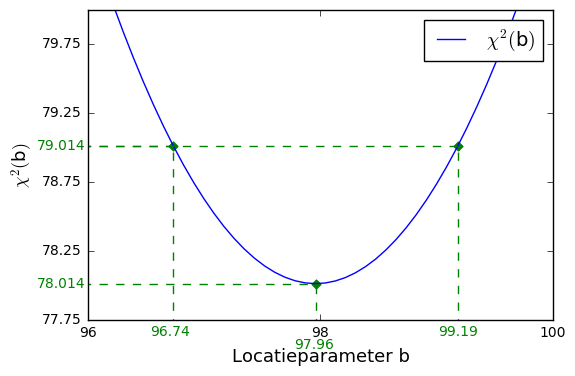

De linkerfout is 1.22 en de rechterfout is 1.22 op b = 97.96


In [11]:
#fout op locatieparameter b:
j = lambda B: chi2(Positie, Intensiteit, [a,g,u,B], SigmaI) - chi2(Positie, Intensiteit, [a,g,u,b], SigmaI)-1
B1 = opt.fsolve(j,50)[0]
B2 = opt.fsolve(j,150)[0]

sb1 = round(b - B1,2)
sb2 = round(B2 - b,2)
b0 = round(b,2)
B10 = round(B1,2)
B20 = round(B2,2)

#Grafiek van chi-kwadraat in functie van de locatieparameter b
FigB = plt.figure()
Bx = np.linspace(95, 101, 70)
chikwadraat = lambda B: chi2(Positie, Intensiteit, [a,g,u,B], SigmaI)
By = np.array(list(map(chikwadraat,Bx)))
plt.plot(Bx, By, label = r'$\chi^{2}($b$)$')

#Stippellijnen:
CB1 = chikwadraat(B1)
Cb = chikwadraat(b)
CB2 = chikwadraat(B2)

QB = np.linspace(77,CB1,50) #verticale rechte tot 1 sigma verschil
qB = [CB1]*50               #horizontale rechte tot 1 sigma verschil
Qb = np.linspace(77,Cb)     #verticale rechte tot minimum
qb = [Cb]*50                #horizontale rechte tot minimum

MinEenVX = [B1]*50
plt.plot(MinEenVX, QB, 'g--' )
MinEenHX = np.linspace(95, B1, 50)
plt.plot(MinEenHX, qB, 'g--')

PlusEenVX = [B2]*50
plt.plot(PlusEenVX, QB, 'g--' )
PlusEenHX = np.linspace(95, B2, 50)
plt.plot(PlusEenHX, qB, 'g--')

NulVX = [b]*50
plt.plot(NulVX, Qb, 'g--')
NulHX = np.linspace(95,b,50)
plt.plot(NulHX, qb, 'g--')

#belangrijke punten:
plt.scatter([B1,b,B2],[CB1,Cb,CB2],color = 'g', marker = 'D')
plt.figtext(0.23,0.085,str(B10), color = 'g',rotation = 0)
plt.figtext(0.47,0.052,str(b0), color = 'g',rotation = 0)
plt.figtext(0.71,0.085,str(B20), color = 'g',rotation = 0)
plt.figtext(0.04, 0.55, str(round(CB1,3)), color = 'g')
plt.figtext(0.04, 0.205, str(round(Cb,3)), color = 'g')

#opmaak van de grafiek:
plt.axis([96,100,77.75,80])
plt.figtext(0.365,0.02,r"Locatieparameter b", fontsize = 13) #xlabel
plt.ylabel(r'$\chi^{2}($b$)$', fontsize = 13)
plt.xticks([96,98,100],[96,98,100])
plt.yticks([77.75, 78.25, 78.75, 79.25, 79.75],[77.75, 78.25, 78.75, 79.25, 79.75])
plt.legend(fontsize=14)
plt.show()

print("De linkerfout is "+str(sb1)+" en de rechterfout is "+str(sb2)+" op b = "+str(b0))

De locatieparameter b is dus gelijk aan $97.96\pm 1.22$.

## 2.3) Kwaliteit van de fit:

Om te controleren of de fit wel goed is, wordt eerst het aantal vrijheidsgraden $\nu = N - p$ bepaald, waarbij $N$ het aantal datapunten en $p$ het aantal te fitten parameters zijn.

In [12]:
v = len(Positie) - len([a,g,u,b])
print("Het aantal vrijheidsgraden is "+str(v)+" .")

Het aantal vrijheidsgraden is 66 .


Dan wordt er een $\chi^2_{66}$-toets gedaan met (in dit geval) significantieniveau $\alpha = 5\%$ en als teststatistiek $\chi^2
(a,\gamma,\mu,b)$, waarbij de parameters telkens de beste fitwaarden zijn. 

In [13]:
pwaarde = 1 - stat.chi2.cdf(chi2ftie([a,g,u,b]), v)
print(str(pwaarde*100)+"%")

14.790381439%


De berekende p-waarde is groter dan $5\%$ en kleiner dan $95\%$, dus is de gemaakte fit van goede kwaliteit.